Import all neccessary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV

Data Cleaning and Preprocessing which includes exploring the data, Handling missing figures(if any), Encoding categorical variables and Scaling Numerical Features.

In [2]:
df = pd.read_csv('C:\\Users\\ade18\\OneDrive\\Documents\\Data Analysis Projects\\IBM Attrition Employee prediction\\WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the first few rows of the dataset
print(df.head())

# Now get a summary of the dataset
print(df.info())

# Now check for missing values
print(df.isnull().sum())

# Now check for duplicates
print(df.duplicated().sum())

# Encode the categorical variables
df = pd.get_dummies(df, drop_first=True)

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64']).columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

   Age Attrition     BusinessTravel  DailyRate              Department   
0   41       Yes      Travel_Rarely       1102                   Sales  \
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber   
0                 1          2  Life Sciences              1               1  \
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel   
0  ...

EDA


                Age     DailyRate  DistanceFromHome     Education   
count  1.470000e+03  1.470000e+03      1.470000e+03  1.470000e+03  \
mean  -3.504377e-17  5.075305e-17      4.350262e-17  7.008755e-17   
std    1.000340e+00  1.000340e+00      1.000340e+00  1.000340e+00   
min   -2.072192e+00 -1.736576e+00     -1.010909e+00 -1.868426e+00   
25%   -7.581700e-01 -8.366616e-01     -8.875151e-01 -8.916883e-01   
50%   -1.011589e-01 -1.204135e-03     -2.705440e-01  8.504925e-02   
75%    6.653541e-01  8.788772e-01      5.932157e-01  1.061787e+00   
max    2.526886e+00  1.726730e+00      2.444129e+00  2.038524e+00   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction    HourlyRate   
count         1470.0    1.470000e+03             1.470000e+03  1.470000e+03  \
mean             0.0   -1.546760e-16             1.305078e-16  1.691768e-16   
std              0.0    1.000340e+00             1.000340e+00  1.000340e+00   
min              0.0   -1.701283e+00            -1.575686e+00 

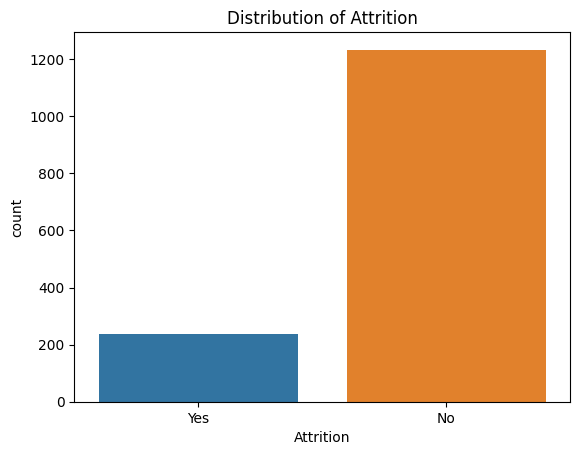

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


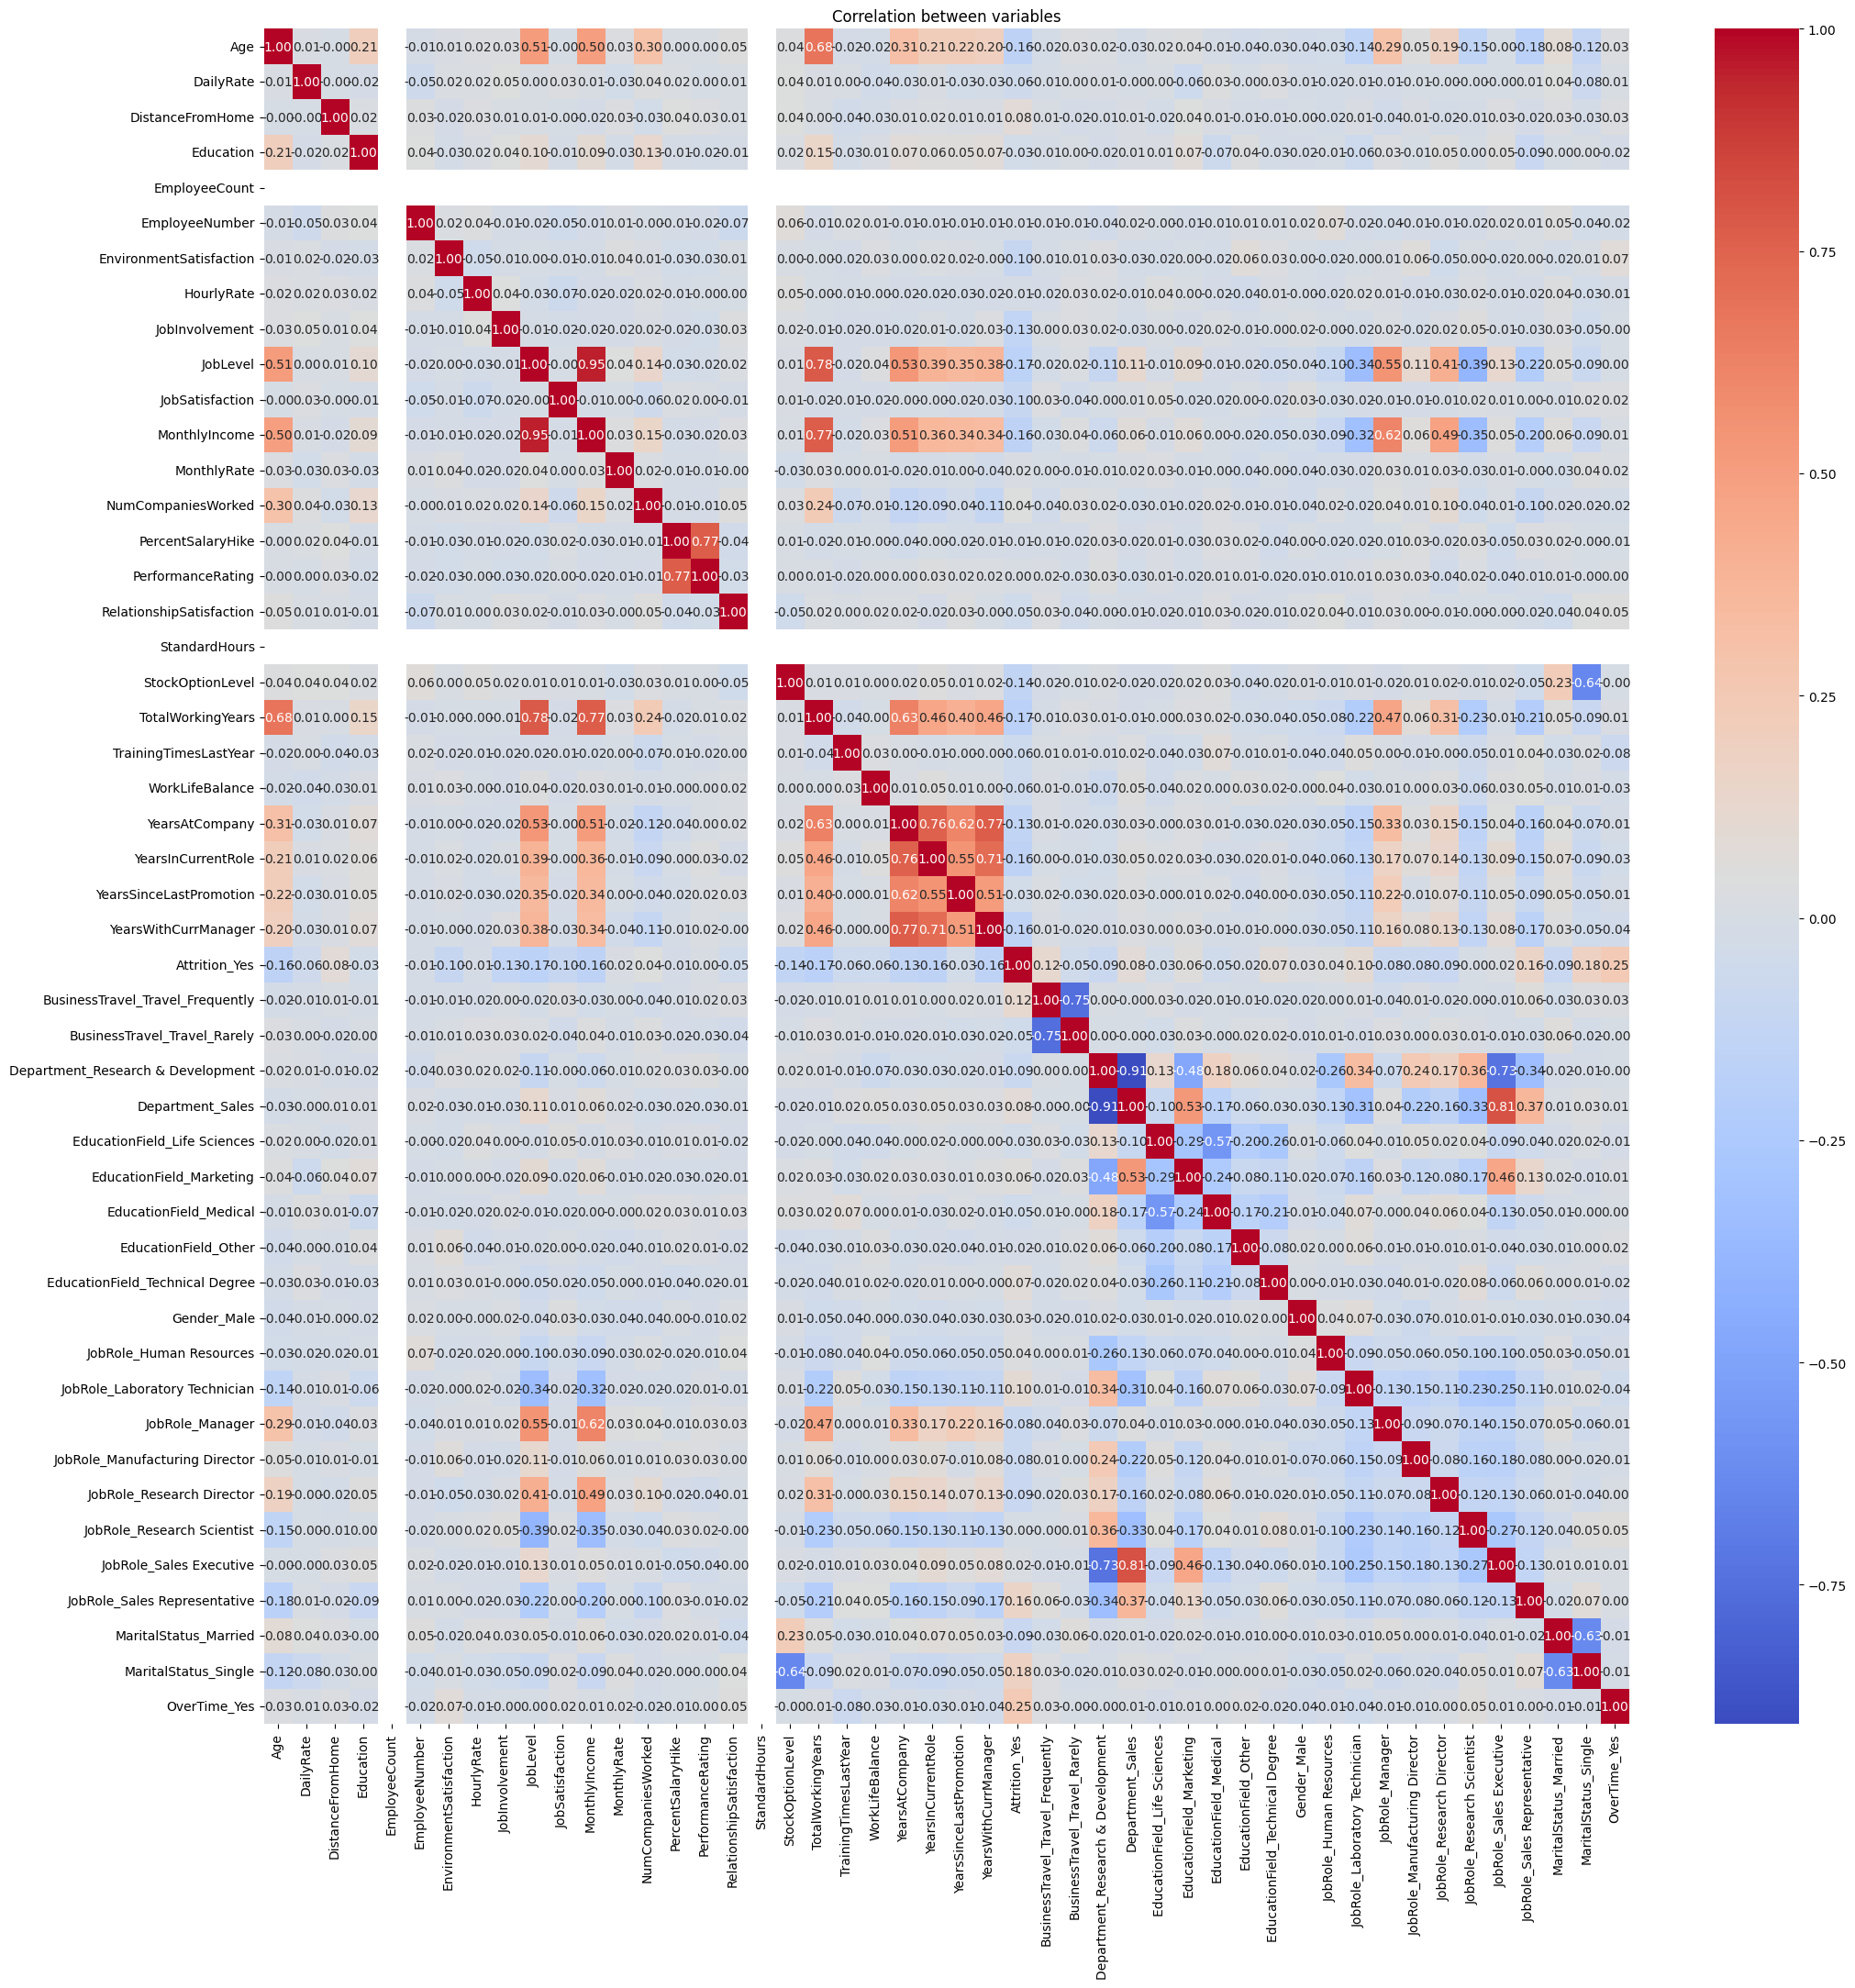

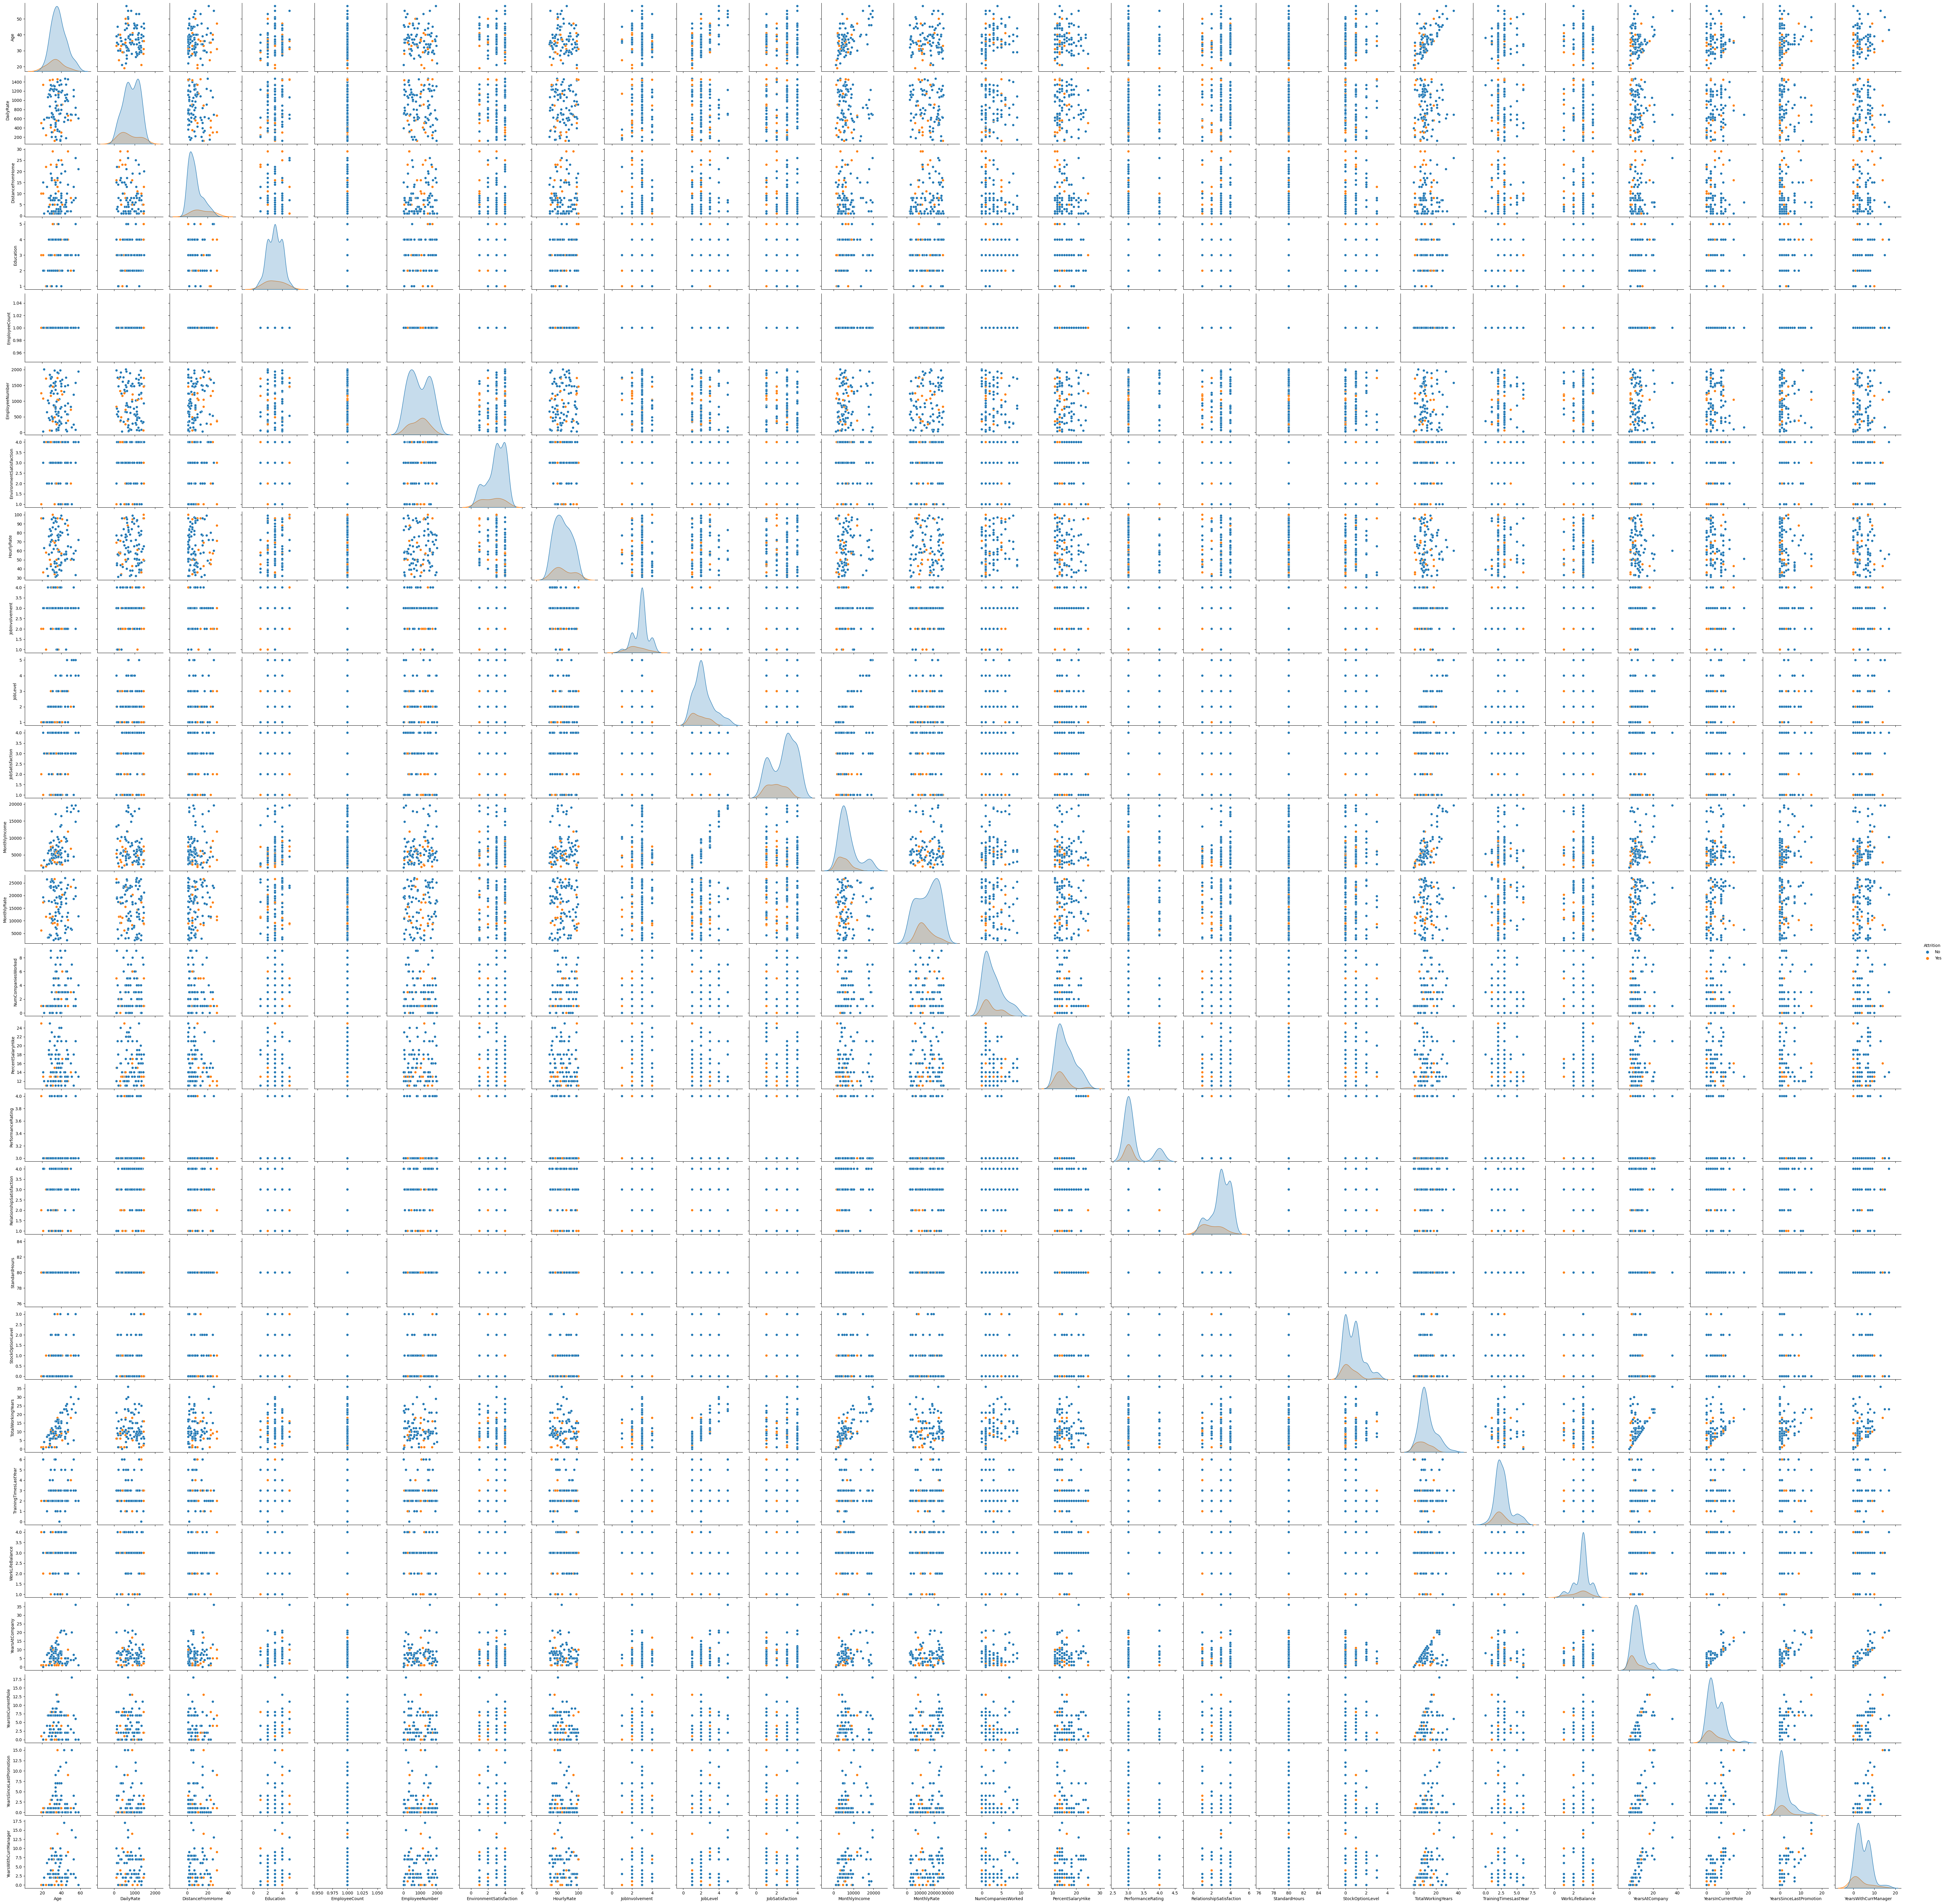

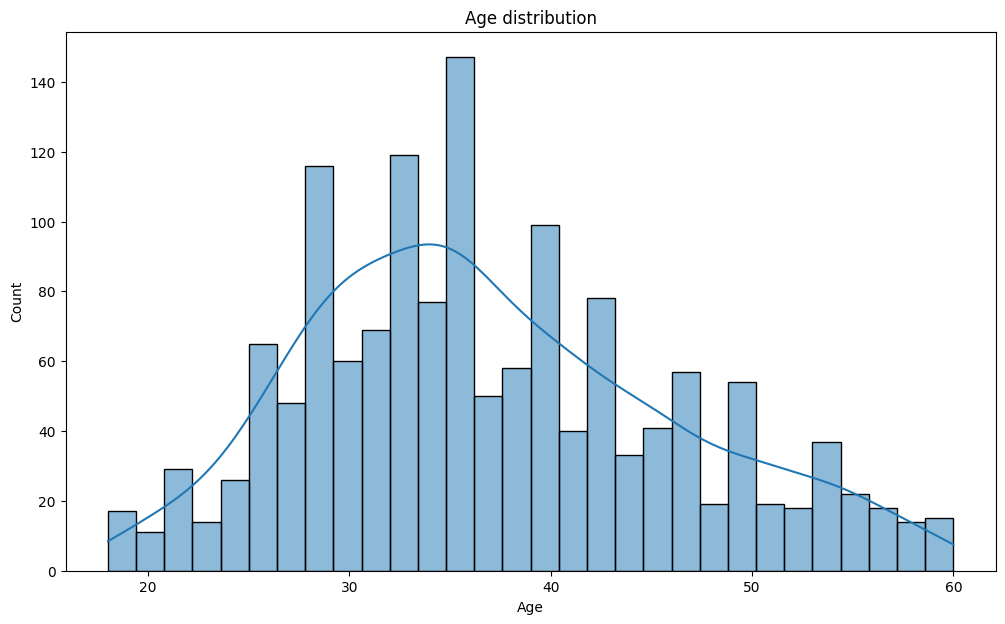

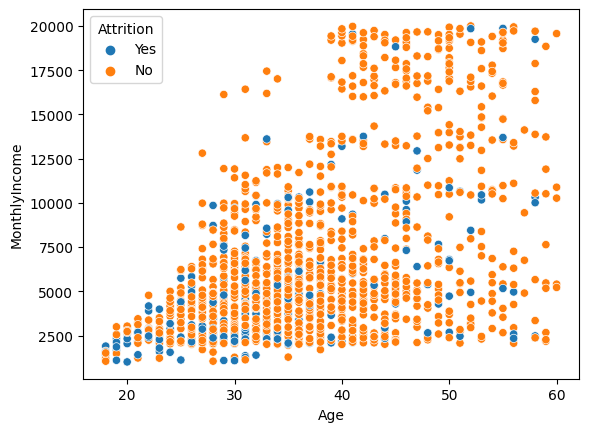

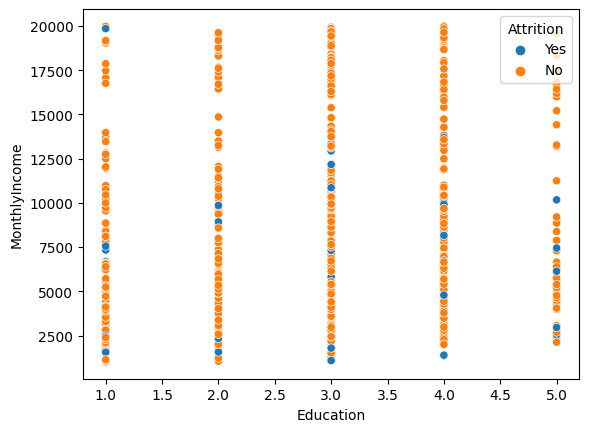

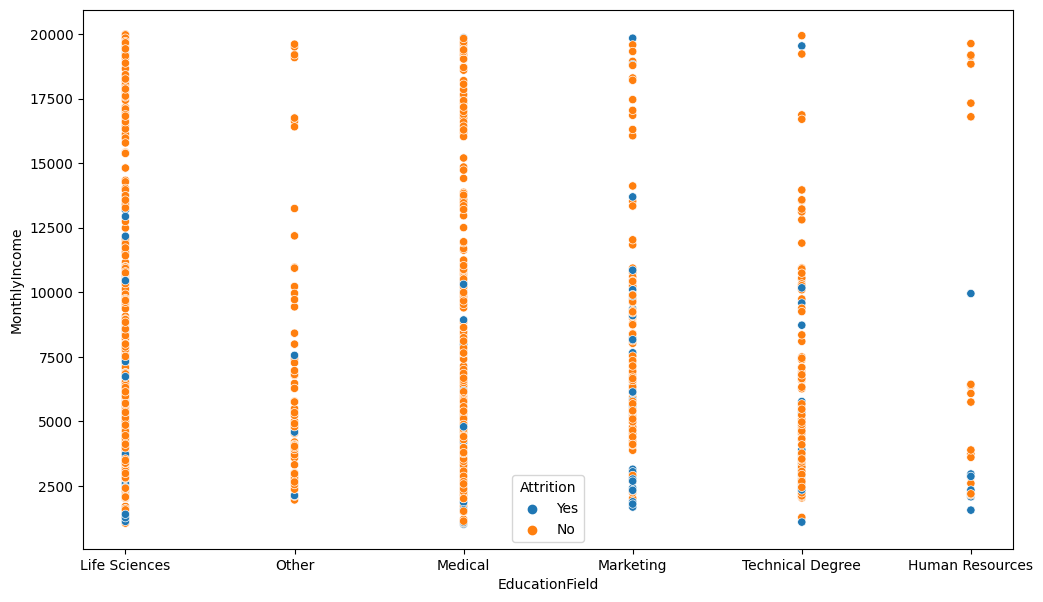

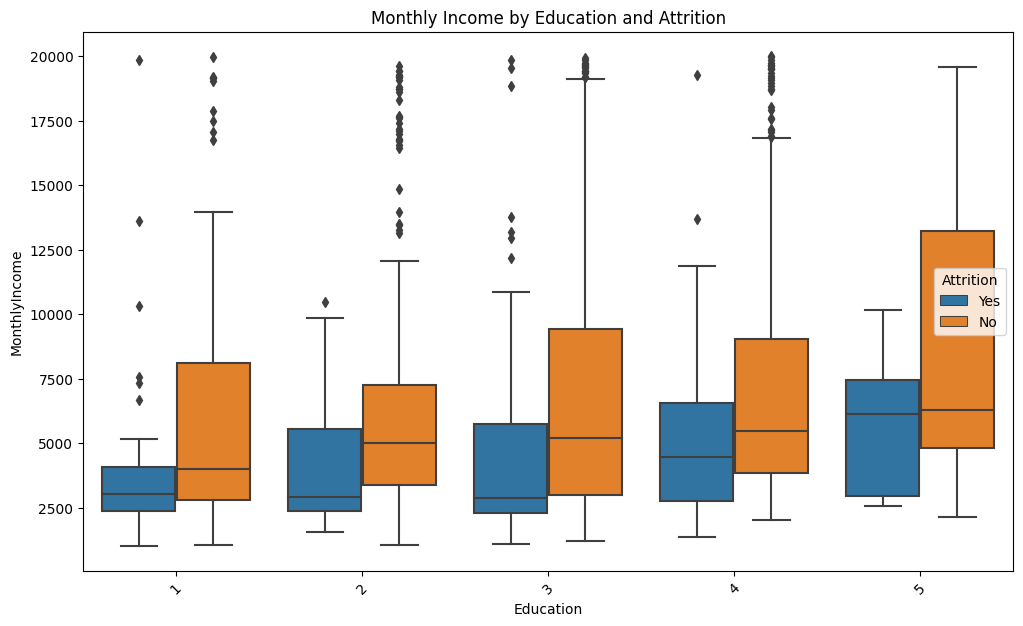

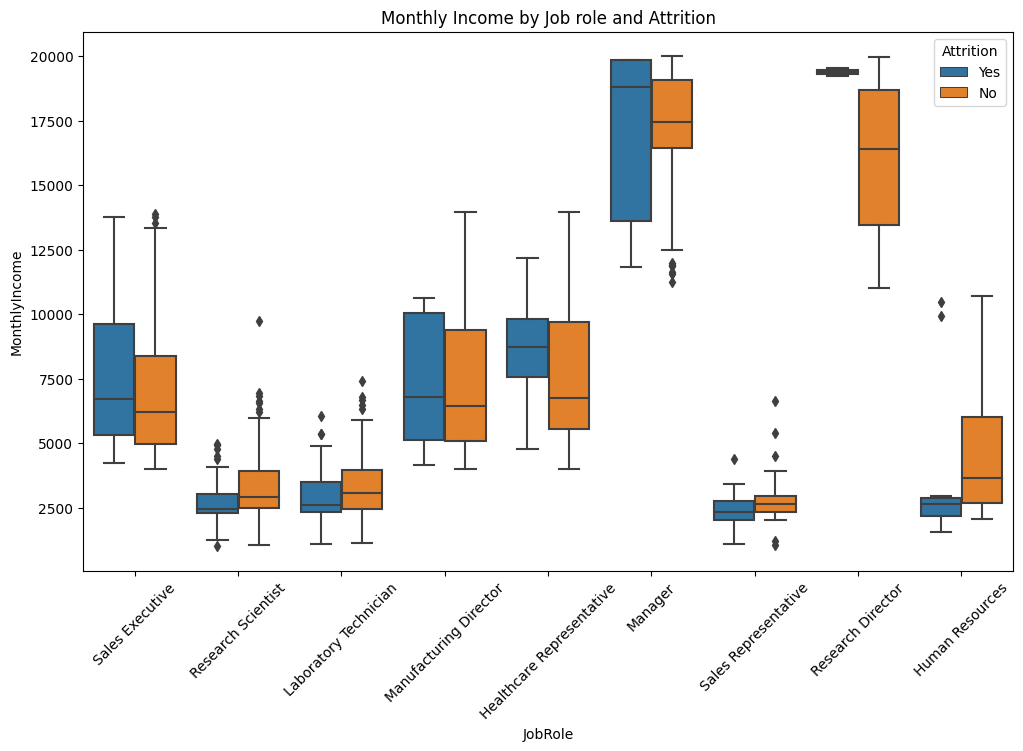

Chi-Squared test: chi2 statistic=10.79600732241067, p-value=0.004525606574479634


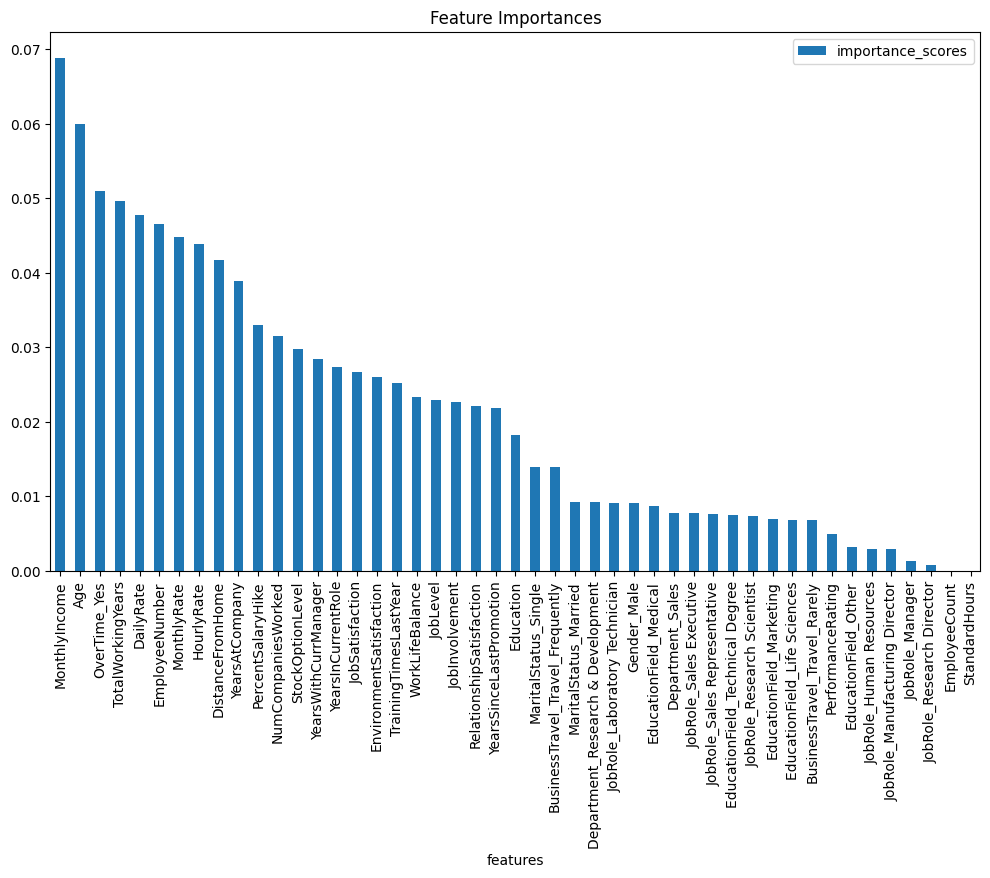

In [3]:
df_eda = pd.read_csv('C:\\Users\\ade18\\OneDrive\\Documents\\Data Analysis Projects\\IBM Attrition Employee prediction\\WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Get a statistical summary of the numerical features from the dataset
print(df.describe())

# Get a summary of the categorical features from the dataset
print(df_eda.describe(include='object'))

# Visualize the distribution of the 'Attrition' variable
sns.countplot(x='Attrition', data=df_eda)
plt.title('Distribution of Attrition')
plt.show()

# Calculate the percentage of employees who left the company
print(df_eda['Attrition'].value_counts(normalize=True) * 100)

# Calculate correlation between the variables
corr = df.corr()

# Visualize the correlation between the variables
plt.figure(figsize=(24, 24))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between variables')
plt.show()

# Sample 100 instances from the dataset
sample_df = df_eda.sample(100, random_state=42)

# Visualize pairwise relationships in the sample
sns.pairplot(sample_df, hue='Attrition')
plt.show()

# Visualize the distribution of 'Age'
plt.figure(figsize=(12, 7))
sns.histplot(df_eda['Age'], bins=30, kde=True)
plt.title('Age distribution')
plt.show()

# Visualize the relationship between 'Age' and 'MonthlyIncome'
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=df_eda)
plt.show()

# Visalize the relationship between 'Education' and 'MonthlyIncome'
sns.scatterplot(x='Education', y='MonthlyIncome', hue='Attrition', data=df_eda)
plt.show()

# Visaulize the relationship between 'EducationField' and 'MonthlyIncome'
plt.figure(figsize=(12, 7))
sns.scatterplot(x='EducationField', y='MonthlyIncome', hue='Attrition', data=df_eda)
plt.show()

# Boxplot for 'Education' and 'MonthlyIncome'
plt.figure(figsize=(12, 7))
sns.boxplot(x='Education', y='MonthlyIncome', hue='Attrition', data=df_eda)
plt.title('Monthly Income by Education and Attrition')
plt.xticks(rotation=45)
plt.show()

# Boxplot for 'JobRole' and 'Attrition'
plt.figure(figsize=(12, 7))
sns.boxplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df_eda)
plt.title('Monthly Income by Job role and Attrition')
plt.xticks(rotation=45)
plt.show()

# Chi-Squared test for 'Departmemt' and 'Attrition'
contingency_table = pd.crosstab(df_eda['Department'], df_eda['Attrition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Squared test: chi2 statistic={chi2}, p-value={p}')

# Convert 'Attrition' to a numerical value
df_eda['Attrition'] = df_eda['Attrition'].map({'Yes': 1, 'No': 0})

# Encode Categorical variables
df_eda = pd.get_dummies(df_eda, drop_first=True)

# Define features and target
X = df_eda.drop('Attrition', axis=1)
y = df_eda['Attrition']

# Fit a random forest classifier to the data to determine feature importance
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

# Get feature importances
feature_importances = rfc.feature_importances_

# Convert the importance scores to a dataframe
feature_imp_df = pd.DataFrame({'features': X.columns, 'importance_scores': feature_importances})

# Plot the feature importances
feature_imp_df.sort_values(by='importance_scores', ascending=False).plot(x='features', y='importance_scores', kind='bar', figsize=(12, 7))
plt.title('Feature Importances')
plt.show()



Assessing Feature importance for Logistic Regression model

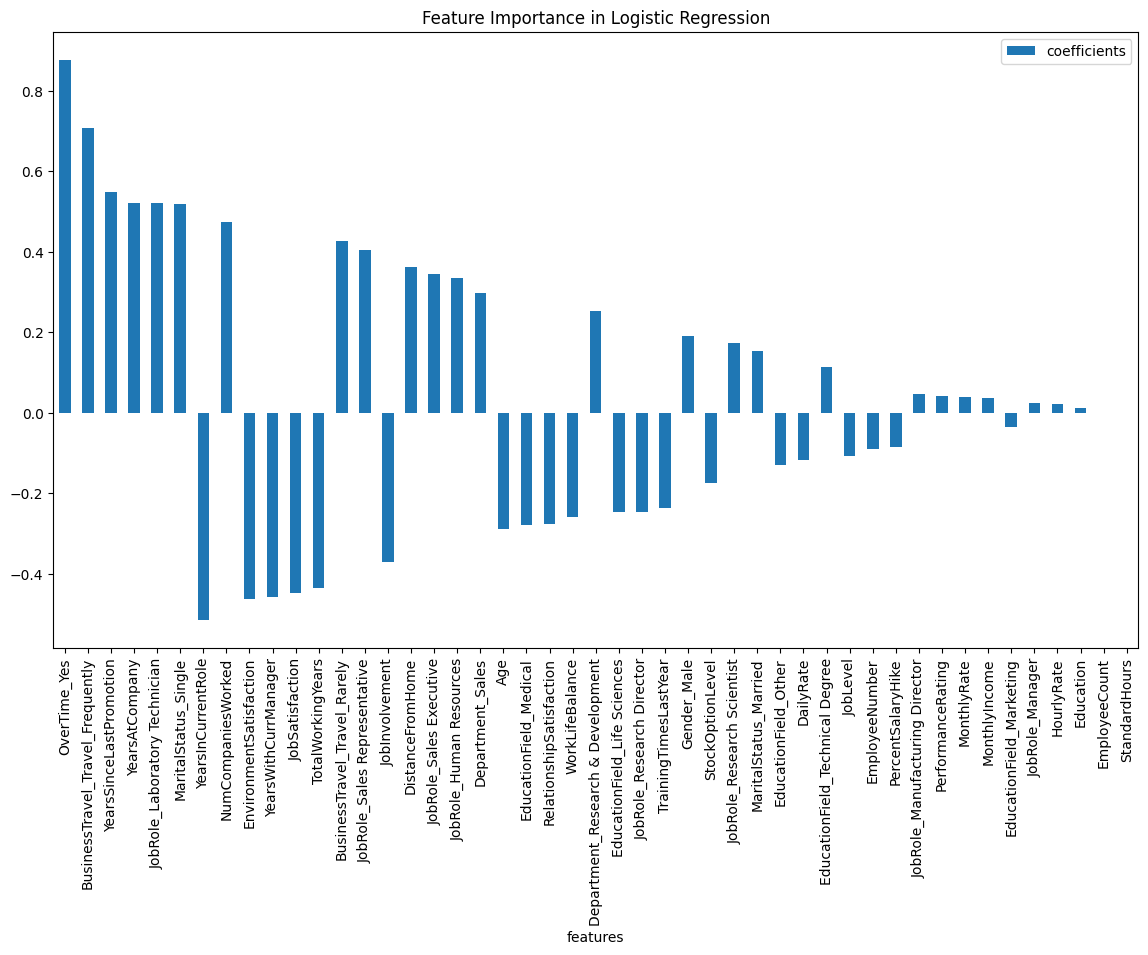

In [4]:
X = df_eda.drop('Attrition', axis=1)
y = df_eda['Attrition']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit a logistic regression model to the data
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

# Get the coefficients of the model
coef = log_reg.coef_[0]

# Create a dataframe for visualization
feature_names = X.columns
df_coef = pd.DataFrame({'features': feature_names, 'coefficients': coef})

# Sort by coefficient values
df_coef['abs_coef'] = np.abs(df_coef['coefficients'])
df_coef = df_coef.sort_values(by='abs_coef', ascending=False).drop('abs_coef', axis=1)

# Plot the coefficients
df_coef.plot(x='features', y='coefficients', kind='bar', figsize=(14, 8))
plt.title('Feature Importance in Logistic Regression')
plt.show()

Predicting Employee attrition using Logistic Regression model

In [11]:
# Select the specified features
features = [
    'OverTime_Yes', 'BusinessTravel_Travel_Frequently', 'JobRole_Sales Representative',
    'MaritalStatus_Single', 'JobRole_Manager', 'JobRole_Research Director',
    'MaritalStatus_Married', 'JobRole_Manufacturing Director'
]

# Define features and target
X = df_eda[features]
y = df_eda['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the logistics regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8571428571428571
Precision: 0.4166666666666667
Recall: 0.08196721311475409
F1 Score: 0.136986301369863
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       380
           1       0.42      0.08      0.14        61

    accuracy                           0.86       441
   macro avg       0.64      0.53      0.53       441
weighted avg       0.81      0.86      0.81       441



Predicting Employee Attrition using Random Forest model

In [14]:
# Define features and target
X = df_eda[['MonthlyIncome', 'Age', 'OverTime_Yes', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome', 'EmployeeNumber', 'DailyRate', 'HourlyRate', 'PercentSalaryHike', 'NumCompaniesWorked', 'StockOptionLevel']]
y = df_eda['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.8526077097505669
Precision: 0.4
Recall: 0.13114754098360656
F1 Score: 0.19753086419753088
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.40      0.13      0.20        61

    accuracy                           0.85       441
   macro avg       0.64      0.55      0.56       441
weighted avg       0.81      0.85      0.82       441



In [18]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500], # Number of trees in the forest
    'max_depth': [1, 2, 3, 4, 5], # Maximum depth of the tree
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

# Create a base model
rfc = RandomForestClassifier(random_state=42)

# Initialize the grid search model
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
Accuracy: 0.8616780045351474
Precision: 0.5
Recall: 0.06557377049180328
F1 Score: 0.11594202898550726
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       380
           1       0.50      0.07      0.12        61

    accuracy                           0.86       441
   macro avg       0.68      0.53      0.52       441
weighted avg       0.82      0.86      0.81       441

